<a href="https://colab.research.google.com/github/cutemfc/Time_series_project/blob/main/Time_series_week_2_ARIMA_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# mount google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install darts

In [ ]:
# Import necessary libraries
import pandas as pd
from darts import TimeSeries

# Load the CSV files into pandas DataFrames
df_stores = pd.read_csv('/content/drive/MyDrive/retail_kaggle_data/stores.csv')
df_items = pd.read_csv('/content/drive/MyDrive/retail_kaggle_data/items.csv')
df_transactions = pd.read_csv('/content/drive/MyDrive/retail_kaggle_data/transactions.csv')
df_oil = pd.read_csv('/content/drive/MyDrive/retail_kaggle_data/oil.csv')
df_holidays_events = pd.read_csv('/content/drive/MyDrive/retail_kaggle_data/holidays_events.csv')

In [ ]:
# read the data from df_filled
df_filled=pd.read_csv('/content/drive/MyDrive/retail_kaggle_data/df_filled.csv')
df_filled.head()

,store_nbr,item_nbr,date,id,unit_sales,onpromotion
0,24,105574,2013-01-02,18790.0,12.0,0.0
1,24,105574,2013-01-03,59692.0,1.0,0.0
2,24,105574,2013-01-04,99664.0,3.0,0.0
3,24,105574,2013-01-05,140805.0,4.0,0.0
4,24,105574,2013-01-06,182800.0,7.0,0.0


In [ ]:
df_train=df_filled.copy()
df_train.head()

,store_nbr,item_nbr,date,id,unit_sales,onpromotion
0,24,105574,2013-01-02,18790.0,12.0,0.0
1,24,105574,2013-01-03,59692.0,1.0,0.0
2,24,105574,2013-01-04,99664.0,3.0,0.0
3,24,105574,2013-01-05,140805.0,4.0,0.0
4,24,105574,2013-01-06,182800.0,7.0,0.0


In [ ]:
# Filter the data before 2014-04-01
max_date = '2014-04-01'
df_train = df_train[df_train['date'] < max_date]
df_train.head()
df_train.shape

(9437752, 6)

In [ ]:
# save the df_train_2014
df_train.to_csv('/content/drive/MyDrive/retail_kaggle_data/df_train_2014.csv', index=False)

# Feature Engineering

In [ ]:
# Time based Features
# Convert date Column to datetime
df_train['date']=pd.to_datetime(df_train['date'])
# Creating new time-based deatures
df_train['year']=df_train['date'].dt.year
df_train['month']=df_train['date'].dt.month
df_train['day']=df_train['date'].dt.day
df_train['day_of_week']=df_train['date'].dt.dayofweek

In [ ]:
df_train.head()

,store_nbr,item_nbr,date,id,unit_sales,onpromotion,year,month,day,day_of_week
0,24,105574,2013-01-02,18790.0,12.0,0.0,2013,1,2,2
1,24,105574,2013-01-03,59692.0,1.0,0.0,2013,1,3,3
2,24,105574,2013-01-04,99664.0,3.0,0.0,2013,1,4,4
3,24,105574,2013-01-05,140805.0,4.0,0.0,2013,1,5,5
4,24,105574,2013-01-06,182800.0,7.0,0.0,2013,1,6,6


In [ ]:
# calculate rolling mean of unit_sales
df_train['rolling_mean_7']=df_train.groupby(['store_nbr','item_nbr'])['unit_sales'].transform(lambda x: x.rolling(7).mean())


In [ ]:
df_train.head()

,store_nbr,item_nbr,date,id,unit_sales,onpromotion,year,month,day,day_of_week,rolling_mean_7
0,24,105574,2013-01-02,18790.0,12.0,0.0,2013,1,2,2,NaN
1,24,105574,2013-01-03,59692.0,1.0,0.0,2013,1,3,3,NaN
2,24,105574,2013-01-04,99664.0,3.0,0.0,2013,1,4,4,NaN
3,24,105574,2013-01-05,140805.0,4.0,0.0,2013,1,5,5,NaN
4,24,105574,2013-01-06,182800.0,7.0,0.0,2013,1,6,6,NaN


In [ ]:
# calculate rolling mean of unit_sales
df_train['rolling_mean_7']=df_train.groupby(['store_nbr','item_nbr'])['unit_sales'].transform(lambda x: x.rolling(7).mean())

In [ ]:
# Merge the training data with the holiday data
df_holidays_events['date']=pd.to_datetime(df_holidays_events['date'])
df_train_holiday=df_train.merge(df_holidays_events, on='date', how='left')

In [ ]:
# Merging df_train with items to get the perishable date
df_train_items=df_train.merge(df_items, on='item_nbr', how='left')
df_train_items['perishable']=df_train_items['perishable'].astype(bool)

In [ ]:
# Assume train_df is the variable that has data in it
# df_store is the dataframe that contains data about store
# merge two dataframe
df_train_stores = df_train.merge(df_stores, on='store_nbr', how='left')
df_train_stores.head()



,store_nbr,item_nbr,date,id,unit_sales,onpromotion,year,month,day,day_of_week,rolling_mean_7,city,state,type,cluster
0,24,105574,2013-01-02,18790.0,12.0,0.0,2013,1,2,2,NaN,Guayaquil,Guayas,D,1
1,24,105574,2013-01-03,59692.0,1.0,0.0,2013,1,3,3,NaN,Guayaquil,Guayas,D,1
2,24,105574,2013-01-04,99664.0,3.0,0.0,2013,1,4,4,NaN,Guayaquil,Guayas,D,1
3,24,105574,2013-01-05,140805.0,4.0,0.0,2013,1,5,5,NaN,Guayaquil,Guayas,D,1
4,24,105574,2013-01-06,182800.0,7.0,0.0,2013,1,6,6,NaN,Guayaquil,Guayas,D,1


In [ ]:
# assume df_items is the datafeame
# contains data in items
df_train_items=df_train.merge(df_items,on='item_nbr',how='left')
df_train_items.head()


,store_nbr,item_nbr,date,id,unit_sales,onpromotion,year,month,day,day_of_week,rolling_mean_7,family,class,perishable
0,24,105574,2013-01-02,18790.0,12.0,0.0,2013,1,2,2,NaN,GROCERY I,1045,0
1,24,105574,2013-01-03,59692.0,1.0,0.0,2013,1,3,3,NaN,GROCERY I,1045,0
2,24,105574,2013-01-04,99664.0,3.0,0.0,2013,1,4,4,NaN,GROCERY I,1045,0
3,24,105574,2013-01-05,140805.0,4.0,0.0,2013,1,5,5,NaN,GROCERY I,1045,0
4,24,105574,2013-01-06,182800.0,7.0,0.0,2013,1,6,6,NaN,GROCERY I,1045,0


# Split the data into training and testing portions

In [ ]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [ ]:
from darts import TimeSeries

In [ ]:
# check the missing values
df_train.isnull().sum()

,0
store_nbr,0
item_nbr,0
date,0
id,6690477
unit_sales,0
onpromotion,6690477
year,0
month,0
day,0
day_of_week,0


In [ ]:
# check duplicate date
duplicates = df_train[df_train.duplicated(subset=['date'], keep=False)]
print(duplicates)
duplicates.shape


          store_nbr  item_nbr       date        id  unit_sales  onpromotion  \
0                24    105574 2013-01-02   18790.0        12.0          0.0   
1                24    105574 2013-01-03   59692.0         1.0          0.0   
2                24    105574 2013-01-04   99664.0         3.0          0.0   
3                24    105574 2013-01-05  140805.0         4.0          0.0   
4                24    105574 2013-01-06  182800.0         7.0          0.0   
...             ...       ...        ...       ...         ...          ...   
35068118         51   2123791 2014-03-27       NaN         0.0          NaN   
35068119         51   2123791 2014-03-28       NaN         0.0          NaN   
35068120         51   2123791 2014-03-29       NaN         0.0          NaN   
35068121         51   2123791 2014-03-30       NaN         0.0          NaN   
35068122         51   2123791 2014-03-31       NaN         0.0          NaN   

          year  month  day  day_of_week  rolling_me

(9437752, 11)

In [ ]:
duplicate_dates = df_train[df_train.duplicated(subset=['date'])]['date'].unique()
print(duplicate_dates)
duplicate_dates.shape


<DatetimeArray>
['2013-01-02 00:00:00', '2013-01-03 00:00:00', '2013-01-04 00:00:00',
 '2013-01-05 00:00:00', '2013-01-06 00:00:00', '2013-01-07 00:00:00',
 '2013-01-08 00:00:00', '2013-01-09 00:00:00', '2013-01-10 00:00:00',
 '2013-01-11 00:00:00',
 ...
 '2014-03-22 00:00:00', '2014-03-23 00:00:00', '2014-03-24 00:00:00',
 '2014-03-25 00:00:00', '2014-03-26 00:00:00', '2014-03-27 00:00:00',
 '2014-03-28 00:00:00', '2014-03-29 00:00:00', '2014-03-30 00:00:00',
 '2014-03-31 00:00:00']
Length: 454, dtype: datetime64[ns]


(454,)

In [ ]:
# Groupby by 'date' and aggregate 'unit_sales' by sum
df_train = df_train.groupby('date')['unit_sales'].sum().reset_index()
# Convert to Darts Timeseries objects
series = TimeSeries.from_dataframe(df_train, time_col='date', value_cols='unit_sales', fill_missing_dates=True,freq='D')

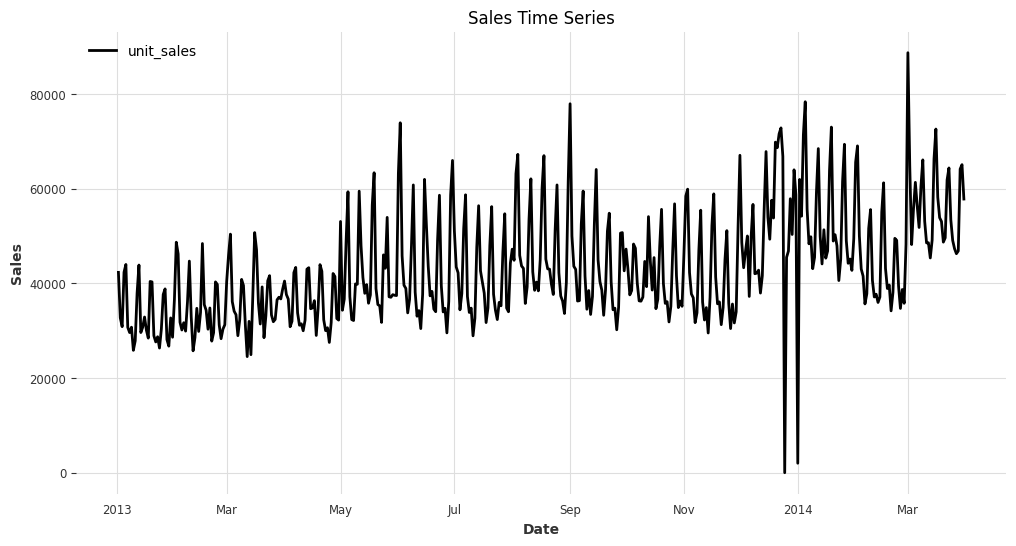

In [ ]:
# Visualize the sales data
plt.figure(figsize=(12, 6))
series.plot()
plt.title('Sales Time Series')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

# Split the data into Trian and Testing sets

In [ ]:
# Split the data (80% train and 20% testing)
train, test = series.split_after(0.8)

In [ ]:
df_train.head()

,date,unit_sales
0,2013-01-02,42320.0
1,2013-01-03,32708.0
2,2013-01-04,30849.0
3,2013-01-05,42351.0
4,2013-01-06,43988.0


In [ ]:
from darts.models import ARIMA

# Modeling with ARIMA

In [ ]:
# Initialize ARIMA with (p, d, q) parameters, p is the previous obsrvations, 1 differencing to make stationary and q is the moving average terms
arima_model = ARIMA(p=5, d=1, q=0)

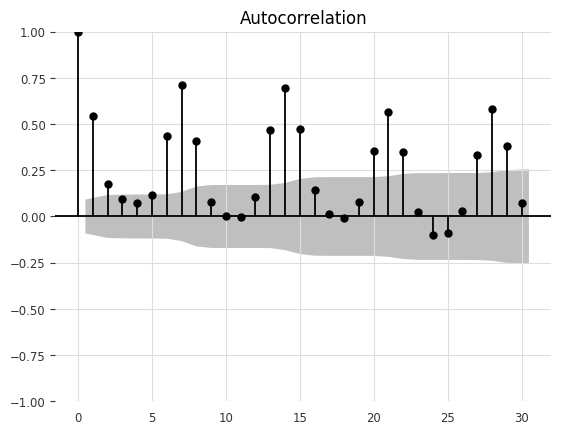

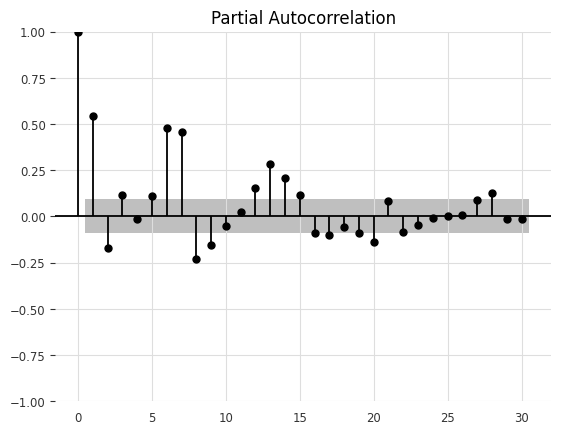

In [ ]:
# plt the acf and pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(df_train['unit_sales'], lags=30)
plt.show()
plot_pacf(df_train['unit_sales'], lags=30)
plt.show()

# Both acf and pacf have several significant spikes and it is better to apply the arma model. From acf, it has the seasonal effect. It is better to apply sarima

<Axes: xlabel='date'>

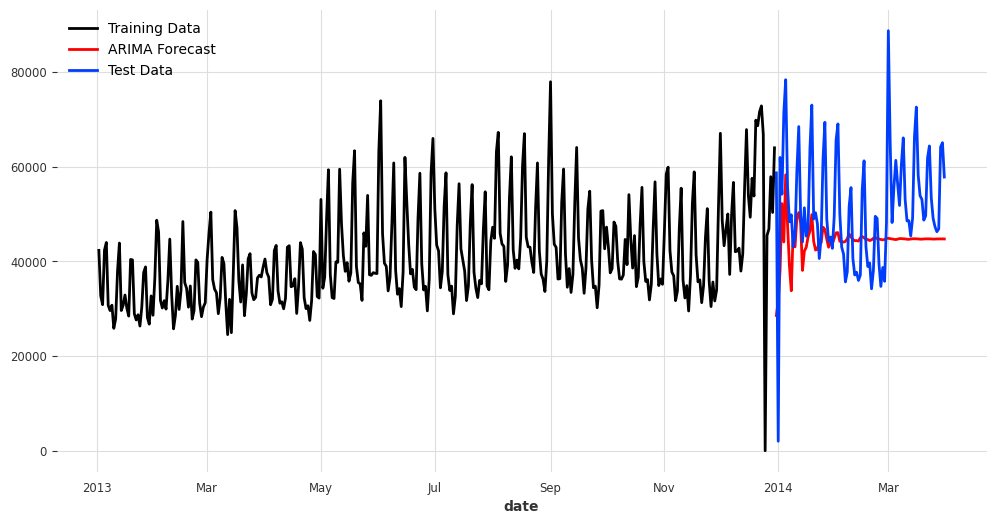

In [ ]:
# Fit the arima model on the trianing data, p=5, d=1 and q=0
arima_model_fit = arima_model.fit(train)
# Forcast the next values(the same length as the test set)
arima_forecast = arima_model.predict(len(test))
# Plot ARIMPA forcast vs actual data
plt.figure(figsize=(12, 6))
train.plot(label='Training Data')
arima_forecast.plot(label='ARIMA Forecast',color='red')
test.plot(label='Test Data')

# Evaluate the model

In [ ]:
import numpy as np
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error, mean_absolute_percentage_error

Mean Absolute Error (MAE): 10094.32
R² Score: -0.19
Mean Squared Error (MSE): 171902265.97
Mean Absolute Percentage Error (MAPE): 33.67%


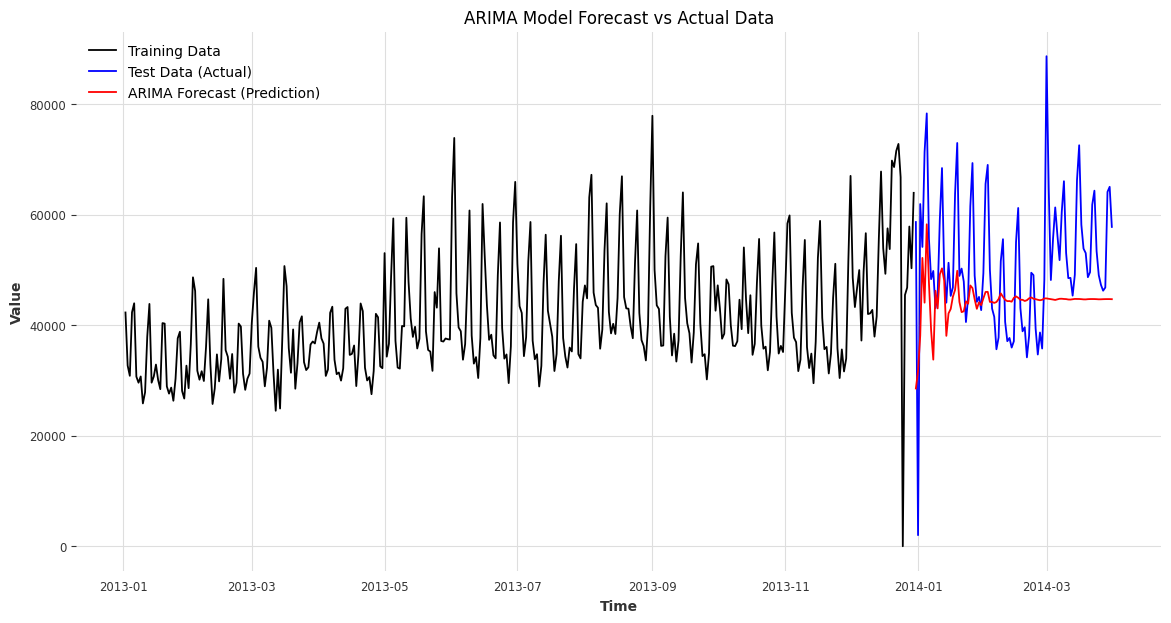

In [ ]:
## make sure arima_forecast length are the same
arima_forecast = arima_forecast[:len(test)]
test = test[:len(arima_forecast)]


# Extract the values from the TimeSeries objects as numpy arrays
test_values = test.univariate_values()
arima_forecast_values = arima_forecast.univariate_values()

# Metric evaluation
mae = mean_absolute_error(test_values, arima_forecast_values)
r2 = r2_score(test_values, arima_forecast_values)
mse = mean_squared_error(test_values, arima_forecast_values)
mape = np.mean(np.abs((test_values - arima_forecast_values) / test_values)) * 100

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R² Score: {r2:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

# Visualization ：Train, Test, and Prediction
plt.figure(figsize=(14, 7))
plt.plot(train.to_dataframe()['unit_sales'], label='Training Data', color='black')
plt.plot(test.to_dataframe()['unit_sales'], label='Test Data (Actual)', color='blue')
plt.plot(arima_forecast.to_dataframe()['unit_sales'], label='ARIMA Forecast (Prediction)', color='red')

plt.title('ARIMA Model Forecast vs Actual Data')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

# The mean absolute percentage error with 33.67%, It still has space to improve.

#  Autoarima

In [ ]:
!pip uninstall -y numpy
!pip install numpy==1.24.3


Found existing installation: numpy 2.0.2
Uninstalling numpy-2.0.2:
  Successfully uninstalled numpy-2.0.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 29.6 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 2.0.6 requires numpy>=1.24.4, but you have numpy 1.24.3 which is incompatible.
albucore 0.0.24 requires numpy>=1.24.4, but you have numpy 1.24.3 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 1.24.3 which is incompatible.
treescope 0.1.9 requires numpy>=1.25.2, but you have numpy 1.24.3 which is incompatible.
jax 0.5.2 requires numpy>=1.25, but you have numpy 1.24.3 which is incompatible.
blosc2 3.3.1 requires numpy>=1.26, but you have numpy 1.24.3 which is incompatible.
jaxlib 0.5.1 requires numpy>=1.25, but you have numpy 1.24.3 which is incompatible.
thinc 8.3.6 requires 

In [ ]:
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 20.3 MB/s eta 0:00:00


In [ ]:
from pmdarima import auto_arima

ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

In [ ]:
train['unit_sales'].shape


In [ ]:
# Find the optimal parameter for the sarima, auto_arima is only used one dimentional series
model = auto_arima(df_train["unit_sales"], start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, # max is 5
                         m=7, #12 is the frequncy of the cycle
                         start_P=0,
                         seasonal=True, #set to seasonal
                         d=None, # d is automatically distinguish the optimal value
                         D=1, #order of the seasonal differencing
                         trace=False,
                         error_action='ignore',
                         suppress_warnings=True,
                         stepwise=True)

In [ ]:
model

Conclusion: The optimal model is p=1, d=0 (no difference) and q (move avg)=1
 The seasonal parameters are P=0(autoregression=0), D=1(seasonal difference) Q=2(seasonal lagvalue), m=7 is the weekly flunction

In [ ]:
len(test)

91